### Librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, 
    precision_score, recall_score, balanced_accuracy_score, 
    classification_report, confusion_matrix, roc_curve, auc
)

# Interpretabilidad
import shap

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# Guardar modelo
import joblib


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Bases

In [2]:
# Base inicial
df_final = pd.read_csv("data/df_final.csv")
df_final['DescRF_Identificacion'] = df_final['DescRF_Identificacion'].astype(str).str.strip()


C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_11356\3685052430.py:2: DtypeWarning: Columns (18,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv("C:/Users/Administrator/Downloads/df_final.csv")


### Selección de variables modelo

In [3]:
variables_utiles = [
    'DescRF_Tipo_estado_alumno', # categorica
    'DescRF_Modalidad', # categorica
    'DescRF_Semestre_SINU', # numerica
    'DescRF_ciclo', # categorica
    'DescRF_SEMESTRE_MEN', #numerica
    'DescRF_Genero', # categorica
    'DescRF_Unidad', # categorica
    'DescRF_Jornada', # categorica
    'DescRF_Tipo_Inscripcion', # categorica
    'DescRF_Sede', # categorica
    'DescRF_Regional', # categorica
    'DescRF_Programa', # categorica
    'DescRF_Fondo', # categorica
    'DescRF_Producto', # categorica
    'DescRF_Fuente', # categorica
    'DescRF_REGLA_ACA', # numerica
    'DescRF_REGLA_INGLES', # numerica
    'DescRF_perdida_academica', # numerica
    'DescRF_tiene_grado', # numerica
    'DescRF_graduado', # numerica
    'DescRF_cod_ciclo', # numerica
    'DescRF_Tipo_Alumno', # categorica
    'DescRF_Nuevo', # categorica
    'DescRF_Valor_Liquidado', # numerica
    'DescRF_Creditos_Orden', # numerica
    'DescAM_MATERIAS_INSCRITAS', # numerica
    'DescAM_MATERIAS_APROBADAS', # numerica
    'DescAM_Porcentaje_aprobacion', # numerica
    'EEpromedio', # numerica
    'EE_UNIDADNEGOCIO', # categorica
    'EE_DEPARTAMENTO_REGIONAL', # categorica
    'EE_OTRA_DISCAPACIDAD', # categorica
    'EE_ESTRATO_ACTUALIZADO', # numerica
    'Edad', # numerica
    'Trabaja', # categorica
    'Deserto' # binaria formada variable respuesta
]
df_modelo = df_final[variables_utiles].copy()


### Separación de los datos

In [4]:
df_temp = df_modelo.copy()

variables_categoricas = df_temp.select_dtypes(include=['object', 'category']).columns

# Codificar variables 
le = LabelEncoder()
for col in variables_categoricas:
    df_temp[col] = le.fit_transform(df_temp[col].astype(str))

X = df_temp.drop('Deserto', axis=1)
y = df_temp['Deserto']

# División 70% entrenamiento, 20% validación y 10% prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, stratify=y_train_full, random_state=42)

print(f"Train: {len(X_train)} \nValidación: {len(X_val)} \nTest: {len(X_test)}")


Train: 143808 
Validación: 17974 
Test: 40446


### XGBoost

Fitting 2 folds for each of 20 candidates, totalling 40 fits


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:03:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros encontrados: {'subsample': 0.6, 'scale_pos_weight': 0.6797868805771786, 'n_estimators': 1500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 1.0}


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:04:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


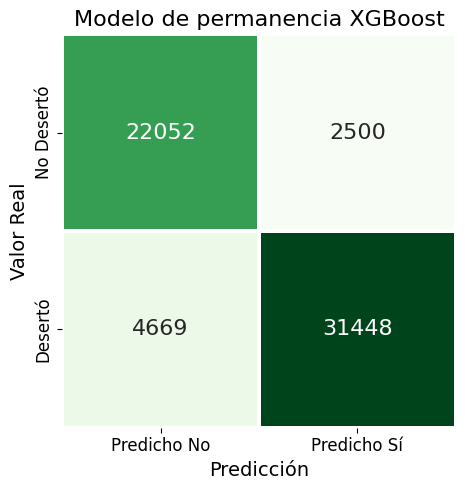

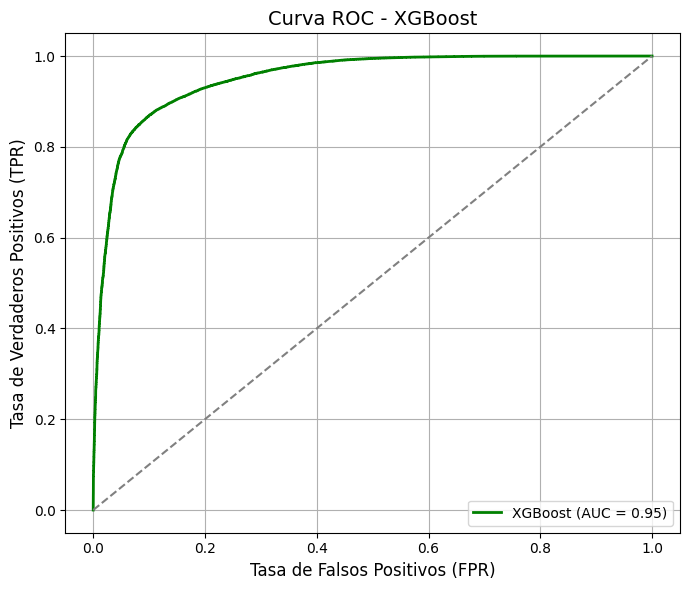

Reporte de Clasificación:
               precision    recall  f1-score   support

  No Desertó     0.8253    0.8982    0.8602     24552
     Desertó     0.9264    0.8707    0.8977     36117

    accuracy                         0.8818     60669
   macro avg     0.8758    0.8845    0.8789     60669
weighted avg     0.8854    0.8818    0.8825     60669

AUC: 0.9509997616179409

 Métricas en conjunto de prueba (Test):

Accuracy: 0.8818
F1-score: 0.8977
ROC-AUC: 0.951
Precision: 0.9264
Recall (Sensibilidad): 0.8707
Balanced Accuracy: 0.8845
Specificity: 0.8982


C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_11356\372029892.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_importances.values, y=top_importances.index, palette="Greens_r")


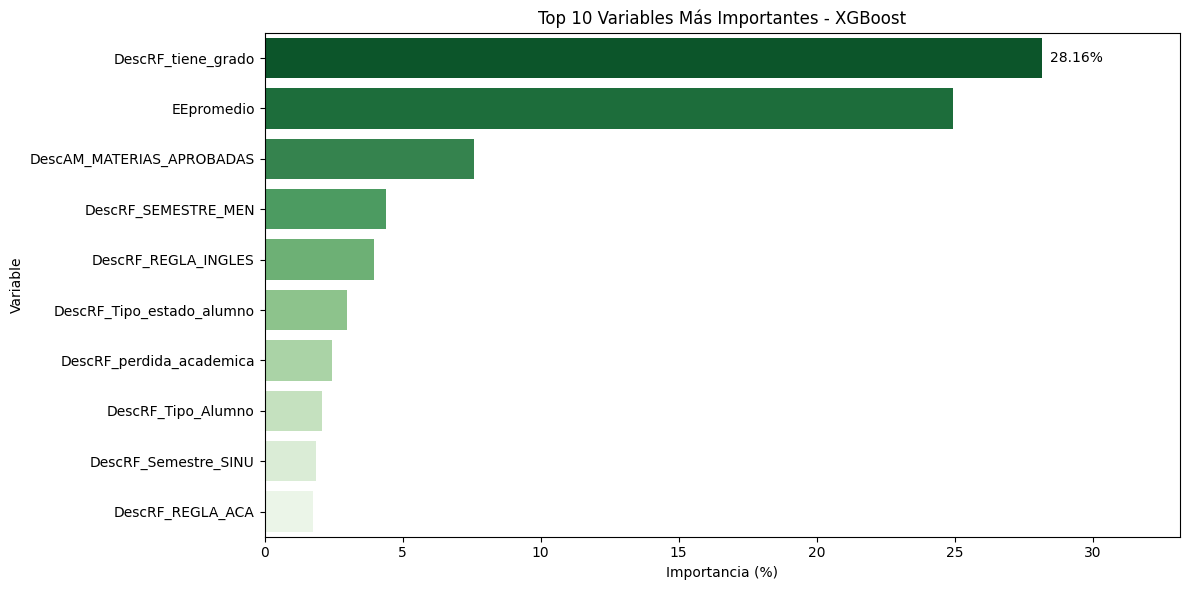

['modelo_xgb_tuned.pkl']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Definir hiperparámetros
param_distributions = {
    'n_estimators': [1500], # Cantidad árboles
    'max_depth': [3, 5, 7, 10], # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Taza de aprendizaje, "cuanto contribuye cada árbol al resultado"
    'subsample': [0.6, 0.8, 1.0], # % datos a usar en cada iteración
    'colsample_bytree': [0.6, 0.8, 1.0], # % columnas a usar en cada árbol
    'gamma': [0, 0.1, 0.2, 0.4], # Umbral mínimo de pérdida en la división del nodo
    'min_child_weight': [1, 3, 5], # Peso mínimo que debe tener un hijo para ocurra una división
    'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]  # Balanceo de clases
}

# Ajuste de hiperparámetros
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=20,  
    scoring='roc_auc',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=2 
)


random_search.fit(X_train, y_train)
print("Mejores parámetros encontrados:", random_search.best_params_)

# Entrenar el modelo
mejores_parametros = random_search.best_params_

modelo_xgb = xgb.XGBClassifier(
    **mejores_parametros,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

modelo_xgb.fit(X_train, y_train)

# Predicción
y_pred = modelo_xgb.predict(X_test)
y_proba = modelo_xgb.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['No Desertó', 'Desertó'], 
                     columns=['Predicho No', 'Predicho Sí'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', linewidths=1.5, linecolor='white',
            annot_kws={"size": 16}, cbar=False, square=True)

plt.title('Modelo de permanencia XGBoost', fontsize=16)
plt.ylabel('Valor Real', fontsize=14)
plt.xlabel('Predicción', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - XGBoost', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Reporte de métricas
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Desertó', 'Desertó'], digits = 4))
print("AUC:", roc_auc_score(y_test, y_proba))

# Predicciones y probabilidades sobre el conjunto de prueba
y_pred_test = modelo_xgb.predict(X_test)
y_proba_test = modelo_xgb.predict_proba(X_test)[:, 1]

# Matriz de confusión para obtener la especificidad
cm_test = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm_test.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Métricas de evaluación en test
print("\n Métricas en conjunto de prueba (Test):\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_test), 4))
print("F1-score:", round(f1_score(y_test, y_pred_test), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_test), 4))
print("Precision:", round(precision_score(y_test, y_pred_test), 4))
print("Recall (Sensibilidad):", round(recall_score(y_test, y_pred_test), 4))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_test), 4))
print("Specificity:", round(specificity, 4))

# Importancia de variables 
importances = pd.Series(modelo_xgb.feature_importances_, index=X.columns)
importances_pct = (importances / importances.sum() * 100).sort_values(ascending=False)

# Mostrar top 10
top_importances = importances_pct.head(10)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_importances.values, y=top_importances.index, palette="Greens_r")

# Agregar etiquetas
for bar in bars.containers[0]:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center', fontsize=10)

plt.title("Top 10 Variables Más Importantes - XGBoost")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.xlim(0, top_importances.values.max() + 5)
plt.tight_layout()
plt.show()

# Modelo OK
joblib.dump(modelo_xgb, 'modelo_xgb_tuned.pkl')

### Shap

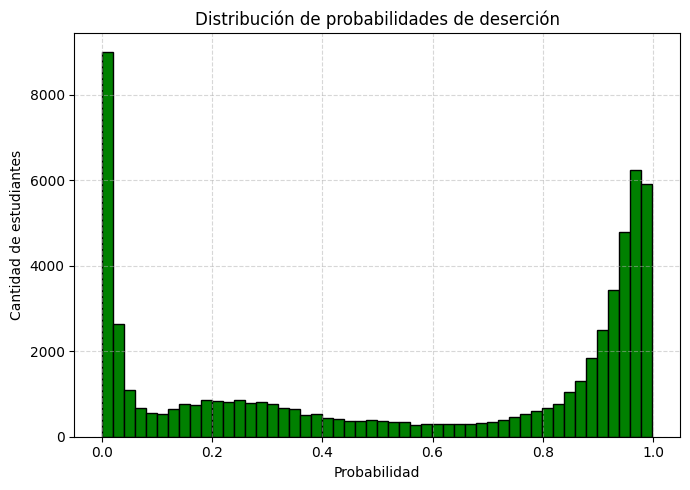

In [6]:
plt.figure(figsize=(7,5))
plt.hist(y_proba, bins=50, color="green", edgecolor="black")
plt.title("Distribución de probabilidades de deserción")
plt.xlabel("Probabilidad")
plt.ylabel("Cantidad de estudiantes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Inicializar SHAP JS
shap.initjs()

# Explicador SHAP para modelo LightGBM
explainer_xgb = shap.TreeExplainer(modelo_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Convertir a DataFrame
shap_df = pd.DataFrame(shap_values_xgb, columns=["SHAP_" + c for c in X.columns])
df_resultado = pd.concat([df_final[["DescRF_Identificacion"]], pd.Series(y_proba, name="ProbabilidadDesercion"), shap_df], axis=1)

# TOP 3 VARIABLES SHAP
def top_3_variables(shap_row, feature_names):
    top_idx = np.argsort(np.abs(shap_row))[-3:][::-1]
    return ", ".join([f"{feature_names[i]} ({shap_row[i]:.2f})" for i in top_idx])

df_resultado["TOP_3_VARIABLES"] = shap_df.apply(lambda row: top_3_variables(row.values, shap_df.columns), axis=1)

# Estudiantes con más riesgo
top_riesgo = df_resultado.sort_values(by="ProbabilidadDesercion", ascending=False).head(5)
print("\n🎯 TOP 5 ESTUDIANTES EN RIESGO")
print(top_riesgo[["DescRF_Identificacion", "ProbabilidadDesercion", "TOP_3_VARIABLES"]])



🎯 TOP 5 ESTUDIANTES EN RIESGO
      DescRF_Identificacion  ProbabilidadDesercion  \
60408            1019013363               0.998669   
38267            1010176626               0.998518   
14109            1001329940               0.998517   
53285            1015450115               0.998466   
14225            1001340668               0.998446   

                                         TOP_3_VARIABLES  
60408  SHAP_EEpromedio (1.38), SHAP_DescRF_Unidad (1....  
38267  SHAP_EEpromedio (1.32), SHAP_DescRF_Unidad (1....  
14109  SHAP_EEpromedio (1.36), SHAP_DescRF_Unidad (1....  
53285  SHAP_EEpromedio (1.35), SHAP_DescRF_Unidad (1....  
14225  SHAP_EEpromedio (1.31), SHAP_DescRF_Unidad (0....  
